In [81]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
conn = sql.connect('database.sqlite')
conn

In [83]:
dir(sql)

['Binary',
 'Connection',
 'Cursor',
 'DataError',
 'DatabaseError',
 'Date',
 'DateFromTicks',
 'Error',
 'IntegrityError',
 'InterfaceError',
 'InternalError',
 'NotSupportedError',
 'OperationalError',
 'PARSE_COLNAMES',
 'PARSE_DECLTYPES',
 'PrepareProtocol',
 'ProgrammingError',
 'Row',
 'SQLITE_ALTER_TABLE',
 'SQLITE_ANALYZE',
 'SQLITE_ATTACH',
 'SQLITE_CREATE_INDEX',
 'SQLITE_CREATE_TABLE',
 'SQLITE_CREATE_TEMP_INDEX',
 'SQLITE_CREATE_TEMP_TABLE',
 'SQLITE_CREATE_TEMP_TRIGGER',
 'SQLITE_CREATE_TEMP_VIEW',
 'SQLITE_CREATE_TRIGGER',
 'SQLITE_CREATE_VIEW',
 'SQLITE_CREATE_VTABLE',
 'SQLITE_DELETE',
 'SQLITE_DENY',
 'SQLITE_DETACH',
 'SQLITE_DONE',
 'SQLITE_DROP_INDEX',
 'SQLITE_DROP_TABLE',
 'SQLITE_DROP_TEMP_INDEX',
 'SQLITE_DROP_TEMP_TABLE',
 'SQLITE_DROP_TEMP_TRIGGER',
 'SQLITE_DROP_TEMP_VIEW',
 'SQLITE_DROP_TRIGGER',
 'SQLITE_DROP_VIEW',
 'SQLITE_DROP_VTABLE',
 'SQLITE_FUNCTION',
 'SQLITE_IGNORE',
 'SQLITE_INSERT',
 'SQLITE_OK',
 'SQLITE_PRAGMA',
 'SQLITE_READ',
 'SQLITE_RECURS

In [84]:
def sql_query(q):
    return pd.read_sql_query(q, conn)

In [85]:
query = "SELECT * FROM Salaries"

sql_query(query)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


1. What is the average TotalPayBenefits for each JobTitle? exclude ('Not Provided', 'Not provided')

In [86]:
query = "SELECT JobTitle, avg(TotalPayBenefits) FROM Salaries WHERE JobTitle != 'Not provided' AND JobTitle != 'Not Provided' GROUP BY 1"

sql_query(query)

,JobTitle,avg(TotalPayBenefits)
0,ACCOUNT CLERK,44035.664337
1,ACCOUNTANT,47429.268000
2,ACCOUNTANT INTERN,29031.742917
3,"ACPO,JuvP, Juv Prob (SFERS)",80266.370000
4,ACUPUNCTURIST,67594.400000
...,...,...
2153,X-RAY LABORATORY AIDE,52705.880385
2154,X-Ray Laboratory Aide,69521.123200
2155,"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",53632.870000
2156,Youth Comm Advisor,60118.550000


2. Which JobTitle has the most employees in each year? exclude ('Not Provided', 'Not provided')

In [87]:
query = '''SELECT Year, JobTitle, EmployeeCount FROM (
    SELECT Year, JobTitle, COUNT(*) AS EmployeeCount
    FROM Salaries
    WHERE JobTitle != 'Not provided' and JobTitle != 'Not Provided'
    GROUP BY 1, 2
    ORDER BY 1, 3 DESC
) AS SUBQUERY
GROUP BY Year'''

sql_query(query)

,Year,JobTitle,EmployeeCount
0,2011,TRANSIT OPERATOR,2388
1,2012,Transit Operator,2262
2,2013,Transit Operator,2295
3,2014,Transit Operator,2479


3. What is the total number of unique employees? exclude ('Not Provided', 'Not provided')

In [88]:
query = "SELECT COUNT(DISTINCT EmployeeName) FROM Salaries WHERE EmployeeName != 'Not provided' and EmployeeName != 'Not Provided'"

sql_query(query)

,COUNT(DISTINCT EmployeeName)
0,110809


4. Show All Employees Ordered By Their TotalPayBenefits In Descending Order? exclude ('Not Provided', 'Not provided')

In [89]:
query = "SELECT EmployeeName, TotalPayBenefits FROM Salaries WHERE EmployeeName != 'Not provided' and EmployeeName != 'Not Provided' ORDER BY 2 DESC"

sql_query(query)

,EmployeeName,TotalPayBenefits
0,NATHANIEL FORD,567595.43
1,GARY JIMENEZ,538909.28
2,David Shinn,510732.68
3,Amy P Hart,479652.21
4,William J Coaker Jr.,436224.36
...,...,...
148643,Roy I Tillery,0.00
148644,Timothy E Gibson,-2.73
148645,Mark E Laherty,-8.20
148646,David P Kucia,-33.89


5. Show All Employees With A TotalPaybenefits Value Between 125,000 and 150,000 And A Job Title 'Firefighter'? exclude ('Not Provided', 'Not provided')

In [90]:
query = "SELECT EmployeeName, TotalPayBenefits, JobTitle FROM Salaries WHERE EmployeeName != 'Not provided' AND EmployeeName != 'Not Provided' AND TotalPayBenefits BETWEEN 125000 AND 150000 AND JobTitle = 'Firefighter'"

sql_query(query)

,EmployeeName,TotalPayBenefits,JobTitle
0,Randall Henderson,147912.75,Firefighter
1,Virginia Cheung,147862.14,Firefighter
2,Travis Hemenez,147664.12,Firefighter
3,Gail Readdie,147452.17,Firefighter
4,Gregory Ginotti,147216.47,Firefighter
...,...,...,...
110,Stephen J Kloster,126784.13,Firefighter
111,Jeffrey D Ryan,126687.13,Firefighter
112,Jovan R Blake,126169.62,Firefighter
113,Dino M Cafferata,125680.52,Firefighter


6. How many employees have no overtime pay or other pay? exclude ('Not Provided', 'Not provided')


In [91]:
query = "SELECT COUNT(EmployeeName) FROM Salaries WHERE EmployeeName != 'Not provided' and EmployeeName != 'Not Provided' AND (OvertimePay = 0 OR OtherPay = 0)"

sql_query(query)

,COUNT(EmployeeName)
0,84266


7. Show top 10 employees having (overtimepay+OtherPay) in bar plot?  exclude ('Not Provided', 'Not provided')

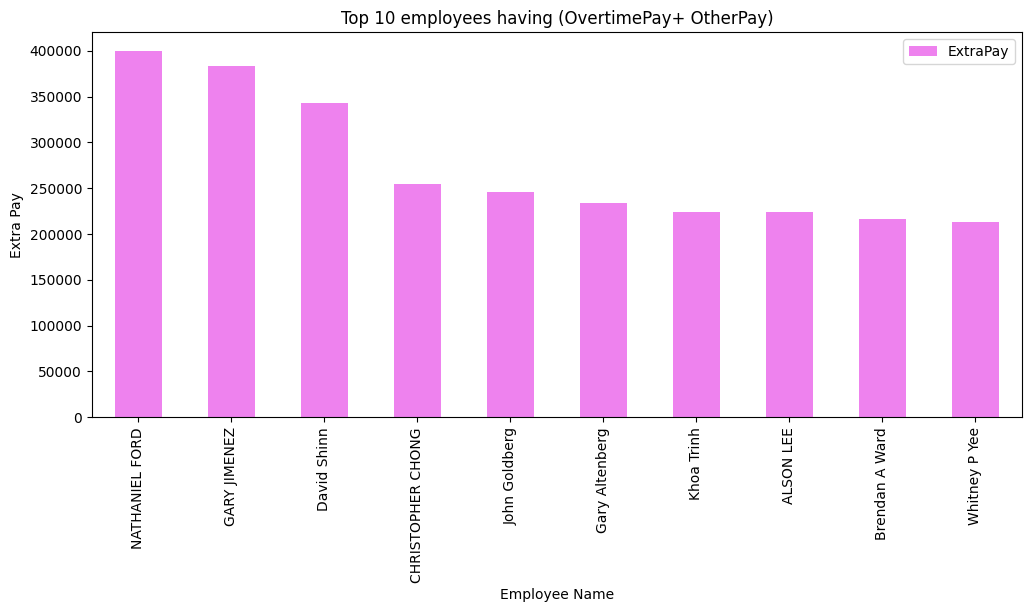

In [92]:
query = "SELECT EmployeeName, (OvertimePay + OtherPay) AS ExtraPay FROM Salaries WHERE EmployeeName != 'Not provided' and EmployeeName != 'Not Provided' ORDER BY 2 DESC LIMIT 10"

data = sql_query(query)

data.plot(kind='bar', x='EmployeeName', y='ExtraPay', color='violet', figsize=(12, 5))

plt.xlabel('Employee Name')
plt.ylabel('Extra Pay')
plt.title('Top 10 employees having (OvertimePay+ OtherPay)')

plt.show()

8. Show The Average of BasePay, OverTime, OtherPay for all employees in pie chart? exclude ('Not Provided', 'Not provided')


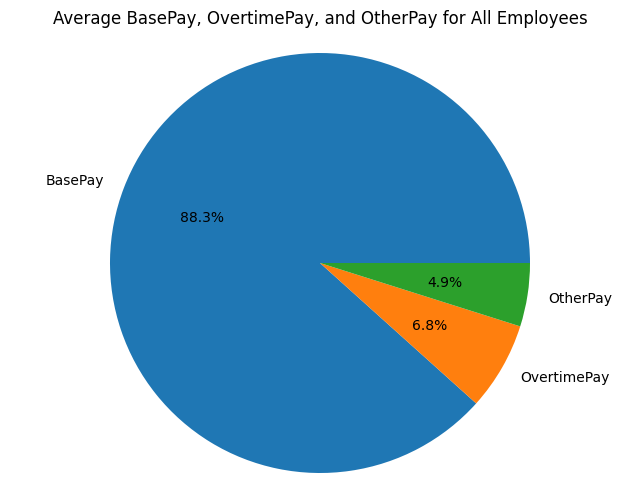

In [93]:
query = "SELECT avg(BasePay), avg(OvertimePay), avg(OtherPay) FROM Salaries WHERE EmployeeName != 'Not provided' and EmployeeName != 'Not Provided'"

data = sql_query(query)

labels = ["BasePay", "OvertimePay", "OtherPay"]
values = data.iloc[0].tolist()

plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct="%1.1f%%")
plt.title("Average BasePay, OvertimePay, and OtherPay for All Employees")
plt.axis("equal")
plt.show()

9. Get the average TotalPayBenefits for each JobTitle, but only for those with an average pay greater than 75000? exclude ('Not Provided', 'Not provided')


In [94]:
query = "SELECT JobTitle, AVG(TotalPayBenefits) FROM Salaries WHERE JobTitle != 'Not provided' AND JobTitle != 'Not Provided' GROUP BY 1 HAVING AVG(TotalPayBenefits) > 75000"

sql_query(query)

,JobTitle,AVG(TotalPayBenefits)
0,"ACPO,JuvP, Juv Prob (SFERS)",80266.370000
1,ADMINISTRATIVE ANALYST III,92698.515000
2,ADMINISTRATIVE ENGINEER,127961.430000
3,ADMINISTRATIVE SERVICES MANAGER,77015.580000
4,"ADMINISTRATOR, SFGH MEDICAL CENTER",257124.440000
...,...,...
1432,Window Cleaner Supervisor,108550.543333
1433,Wire Rope Cable Maint Mechanic,138837.434333
1434,Wire Rope Cable Maint Sprv,242118.323333
1435,Worker's Comp Supervisor 1,96125.531429


10. Get the number of employees (EmployeeName) for each JobTitle, where the count is greater than 10?  exclude ('Not Provided', 'Not provided')


In [95]:
query = '''SELECT JobTitle, COUNT(EmployeeName) FROM Salaries 
WHERE JobTitle != 'Not provided' AND JobTitle != 'Not Provided' 
AND EmployeeName != 'Not provided' and EmployeeName != 'Not Provided'
GROUP BY 1
HAVING COUNT(EmployeeName) > 10'''

sql_query(query)

,JobTitle,COUNT(EmployeeName)
0,ACCOUNT CLERK,83
1,ACCOUNTANT INTERN,48
2,ADMINISTRATIVE ANALYST,93
3,AIRPORT COMMUNICATIONS OPERATOR,27
4,AIRPORT ECONOMIC PLANNER,13
...,...,...
1151,Wire Rope Cable Maint Mechanic,30
1152,Worker's Comp Supervisor 1,14
1153,Worker's Compensation Adjuster,74
1154,X-RAY LABORATORY AIDE,26
